## Google Play Store Data
### Complete EDA from begginers to advanced users

### Description
The data set was downloaded from Kaggle, from the [link]https://www.kaggle.com/datasets/lava18/google-play-store-apps

About Dataset
Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

Content
Each app (row) has values for catergory, rating, size, and more.

Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

Usability
7.06

License
Unknown


Expected update frequency
Not specified

Tags
Business
Computer Science
Internet
Video Games


In [51]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## 2. Data loading and exploring/cleaning
-Let's load the csv file

In [3]:
df=pd.read_csv('./data/googleplaystore.csv')

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
print(f'The names of columns are: {df.columns}')

The names of columns are: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [8]:
df.shape

(10841, 13)

In [9]:
print(f'The number of rowsare {df.shape[0]} and the number of columns are {df.shape[1]}')

The number of rowsare 10841 and the number of columns are 13


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## How to make size a numeric column

In [12]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
3.8M                    62
40M                    

In [13]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### Observations
1. Varies with device
2. M
3. k

In [14]:
df['Size'].isnull().sum()

np.int64(0)

- No missing values in size column, we are good to go

#### Verify the number of 3 different kinds of values

In [15]:
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8829)

In [16]:
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [17]:
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [18]:
8830+316+1695

10841

In [19]:
len(df)

10841

In [20]:
# Let's define a function
def convert_size(size):
    if isinstance (size,str):
        if 'k'in size:
            return float(size.replace('k',''))*1024
        elif 'M' in size:
            return float(size.replace('M',''))*1024*1024
        elif 'Varies with device' in size:
            return np.nan
    return size

In [21]:
# Let's apply this function to the Size column
df['Size']=df['Size'].map(convert_size)

In [22]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [23]:
# Rename the column
df.rename(columns={'Size':'Size_in_Bytes'},inplace=True)

In [24]:
df.head()

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Let' take care of Installs column

In [25]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [26]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [27]:
df['Installs'].isnull().sum()

np.int64(0)

- Remove the + sign
- Remove the ,
- Convert the dtype to int64

In [28]:
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)

In [29]:
df['Installs']=df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

In [30]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: count, dtype: int64

In [31]:
# To remove the rows with 'Free' in Installs column
df=df[df['Installs']!='Free']

In [32]:
# Convert the column to integer
df['Installs'] = df['Installs'].astype(int)

In [33]:
df.describe()

,Rating,Installs
count,9366.000000,1.084000e+04
mean,4.191757,1.546434e+07
std,0.515219,8.502936e+07
min,1.000000,0.000000e+00
25%,4.000000,1.000000e+03
50%,4.300000,1.000000e+05
75%,4.500000,5.000000e+06
max,5.000000,1.000000e+09


In [34]:
# Let's check the reviews column
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6001,), dtype=object)

In [35]:
# To change the datatype of Reviews column
df['Reviews'] = df['Reviews'].astype(int)

In [36]:
df.describe()

,Rating,Reviews,Installs
count,9366.000000,1.084000e+04,1.084000e+04
mean,4.191757,4.441529e+05,1.546434e+07
std,0.515219,2.927761e+06,8.502936e+07
min,1.000000,0.000000e+00,0.000000e+00
25%,4.000000,3.800000e+01,1.000000e+03
50%,4.300000,2.094000e+03,1.000000e+05
75%,4.500000,5.477550e+04,5.000000e+06
max,5.000000,7.815831e+07,1.000000e+09


In [37]:
# To change the datatype of Size in Byte
df['Size_in_Bytes'] = df['Size_in_Bytes'].astype(float)

In [38]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs
count,9366.000000,1.084000e+04,9.145000e+03,1.084000e+04
mean,4.191757,4.441529e+05,2.256133e+07,1.546434e+07
std,0.515219,2.927761e+06,2.368637e+07,8.502936e+07
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09


### To check the Price column

In [39]:
# Let's see how many values with $ in Price column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [40]:
# To repalce $ sign with empty string
df['Price'] = df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)

In [41]:
df['Price'].value_counts()

Price
0         10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

In [42]:
# To change the datatype of Price column
df['Price']=df['Price'].apply(lambda x: float(x))

In [43]:
df.describe()

,Rating,Reviews,Size_in_Bytes,Installs,Price
count,9366.000000,1.084000e+04,9.145000e+03,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,2.256133e+07,1.546434e+07,1.027368
std,0.515219,2.927761e+06,2.368637e+07,8.502936e+07,15.949703
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000


In [44]:
# Using f string to print min, max and mean values of Price column
print(f'The minimum price is: {df["Price"].min()}')
print(f'The maximum price is: {df["Price"].max()}')
print(f'The average price is: {df["Price"].mean()}')

The minimum price is: 0.0
The maximum price is: 400.0
The average price is: 1.027368081180812


In [45]:
# Find the missing values percentage in the dataframe
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Size_in_Bytes     15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Type               0.01
Reviews            0.00
Category           0.00
App                0.00
Installs           0.00
Content Rating     0.00
Price              0.00
Last Updated       0.00
Genres             0.00
dtype: float64

In [46]:
# To find total number of missing values
df.isnull().sum().sum()

np.int64(3180)

<Axes: >

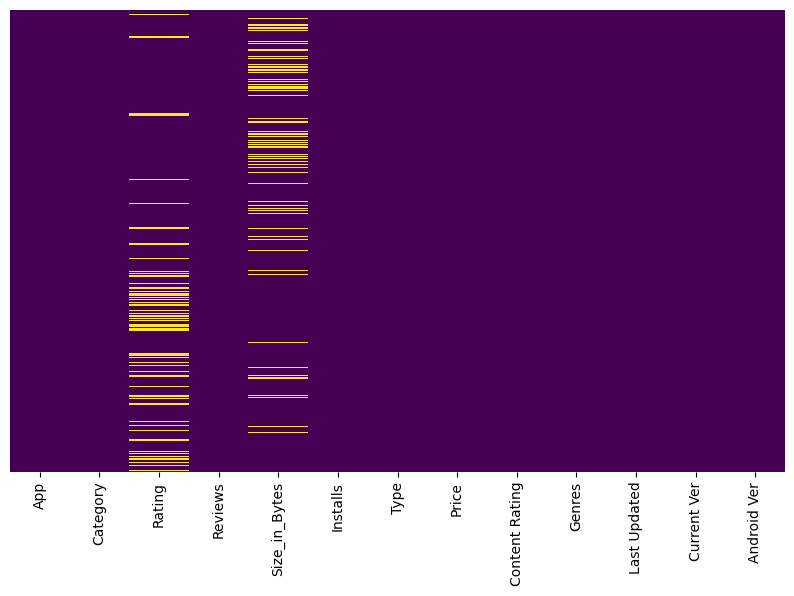

In [47]:
# To plot the heatmap of missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

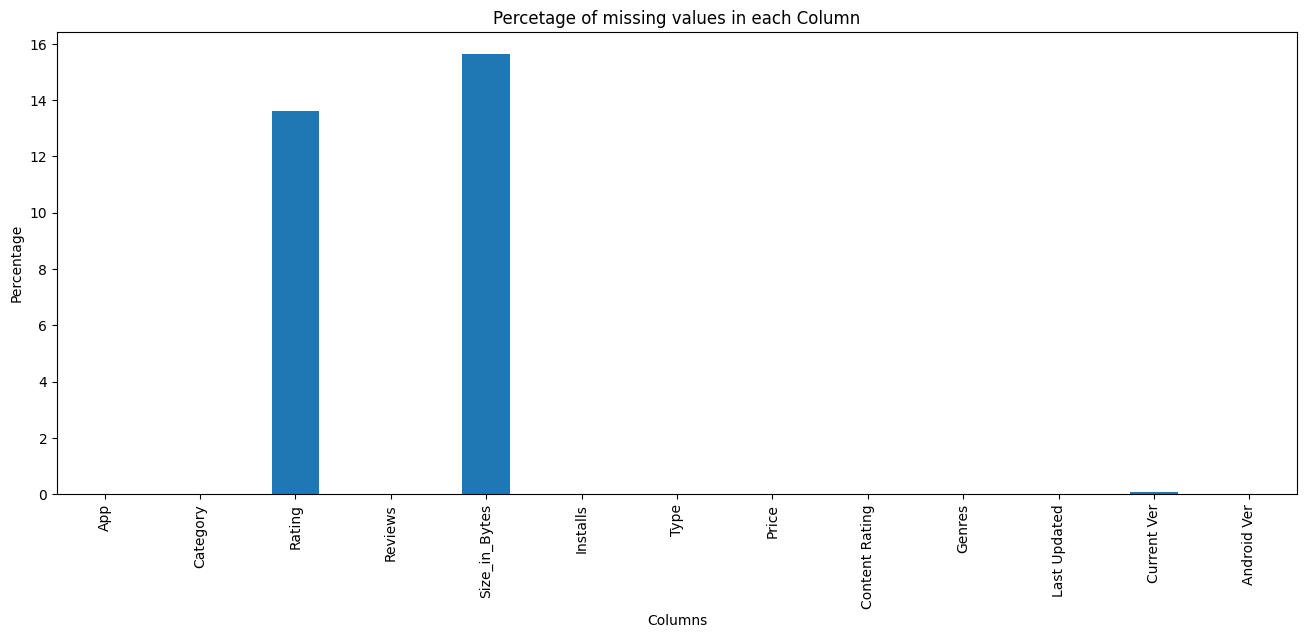

In [48]:
# Make figure size
plt.figure(figsize=(16,6))

# Plot the null values by their percentagr in each column
missing_percentage=df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')

# Add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percetage of missing values in each Column')
plt.show()


<Axes: >

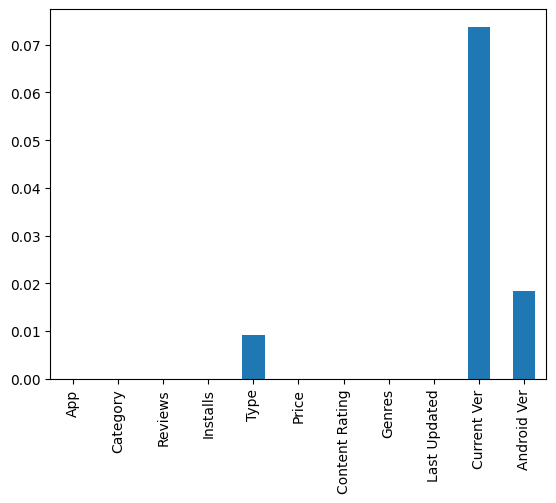

In [49]:
missing_percentage[missing_percentage<1].plot(kind='bar')

## Observations

- Now we have only 5 columns as numeric data type
- We can observe their descriptive statics and make tons of observations as per our hypothesis
- We can see that the *Rating* column has min value of 1 and max value of 5, which is the range of rating and its mean is *4.19*, which is a good rating
- We can seee the *Reviews* column has a min value of 0 and a max value of 78,158,306+ Millions, which is the range of reviews, and the mean is 444,111,93, which is a good number of reviews. 
- Similarly we can observe the other columns and make our observations.
  
  Therefore, themost important thing is to classify app based on correlation matrix and then oberve the descriptive statics of the app category and number installs, reviews, ratings etc.

  ## But even before that we have to deal with the missing values

  ### Dealing with the missing values is one of the most important step in data wrangling process.

  ## Where to learn about the missing values?

<Axes: >

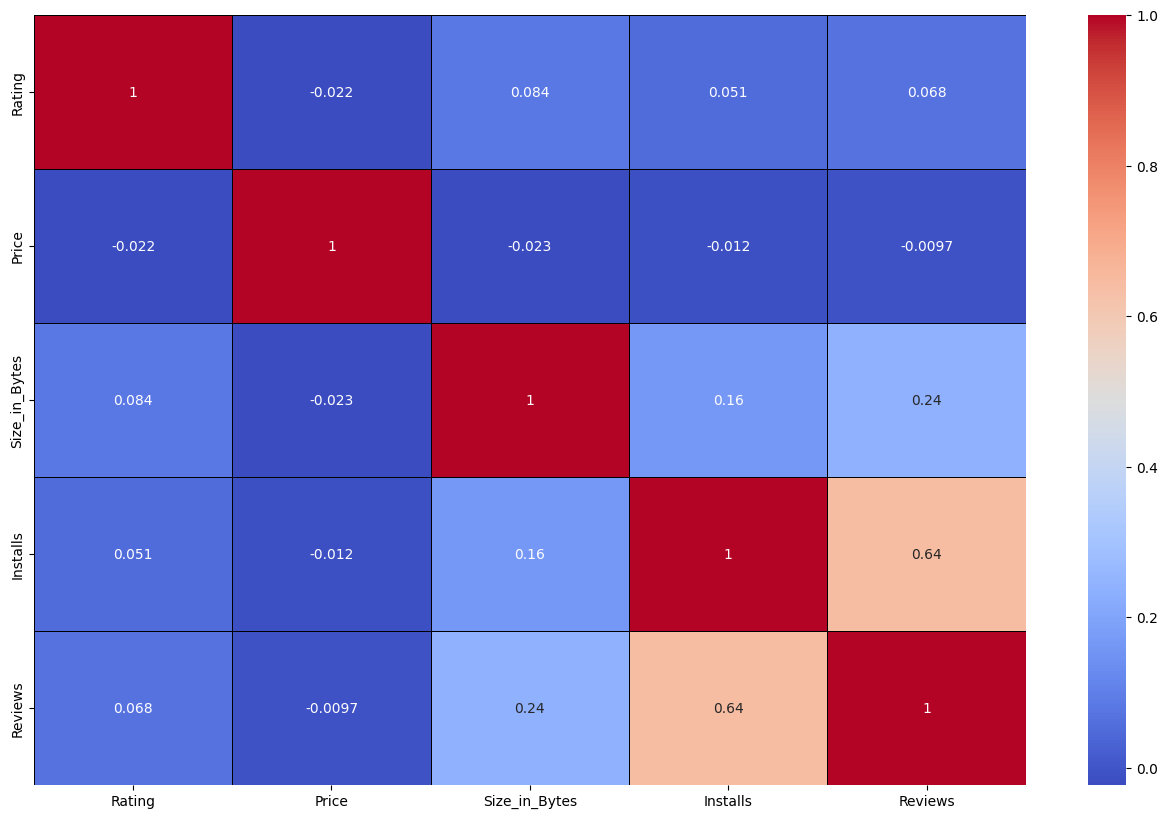

In [52]:
# To make correlation matrix
plt.figure(figsize=(16,10)) # figure size
numeric_cols=['Rating','Price','Size_in_Bytes','Installs','Reviews'] # numeric columns
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm',linewidths=0.5,linecolor='black') # heatmap


In [53]:
# remove the rows with missing values
df.dropna(subset=['Current Ver','Android Ver','Category','Type','Genres'],inplace=True)

In [54]:
# length after removing the null values
print(f'Length of the Dataframe after removing the null values: {len(df)}')

Length of the Dataframe after removing the null values: 10829


- We have removed 12 rows having null values

In [56]:
# Let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_Bytes     1694
Rating            1469
App                  0
Category             0
Reviews              0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [58]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_Bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [59]:
# Making a new column called Installs_category, which will have the category of installs
bins=[-1,0,1000,10000,100000,1000000,10000000,100000000,1000000000]
labels=['no','very low','Low','Moderate','High','Very High','Extremely High','Insane']
df['Installs_category']=pd.cut(df['Installs'],bins=bins,labels=labels)

In [60]:
df['Installs_category'].value_counts()

Installs_category
very low          2692
High              2116
Very High         2004
Moderate          1647
Low               1528
Extremely High     698
Insane             130
no                  14
Name: count, dtype: int64

In [61]:
# Use groupby function to find the trend of Rating with respect to Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
very low,1359.0,4.198749,0.833807,1.0,3.9,4.4,4.8,5.0
Low,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
Moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Extremely High,698.0,4.386533,0.192817,3.1,4.3,4.4,4.5,4.8
Insane,130.0,4.309231,0.186126,3.7,4.2,4.3,4.4,4.7


In [62]:
df['Rating'].isnull().sum()

np.int64(1469)

In [63]:
# In which Installs category, the Rating has Nan values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
very low          1333
Low                 88
Moderate            31
no                  14
High                 3
Very High            0
Extremely High       0
Insane               0
Name: count, dtype: int64

Text(6, 3.5, 'Null values:0')

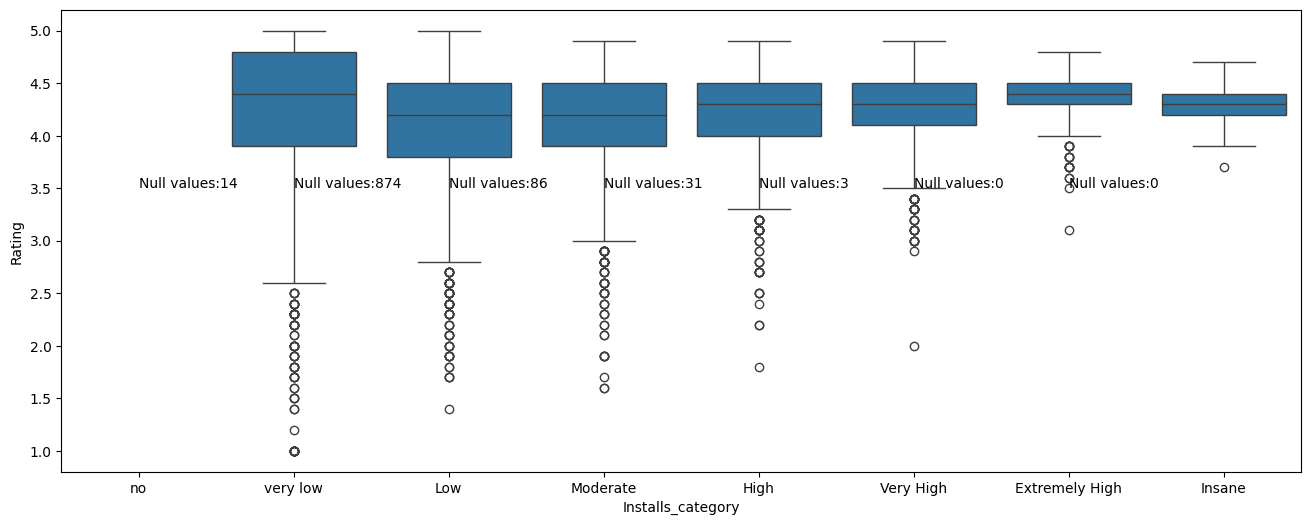

In [64]:
# Plot the box plot of Rating with respect to Installs_category
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category',y='Rating',data=df)
plt.text(0,3.5,'Null values:14')
plt.text(1,3.5,'Null values:874')
plt.text(2,3.5,'Null values:86')
plt.text(3,3.5,'Null values:31')
plt.text(4,3.5,'Null values:3')
plt.text(5,3.5,'Null values:0')
plt.text(6,3.5,'Null values:0')



In [65]:
# To replace the missing values of Rating with the mean of each Installs_category
df['Rating']=df['Rating'].fillna(df.groupby('Installs_category')['Rating'].transform('mean'))

<Axes: xlabel='Installs_category', ylabel='Reviews'>

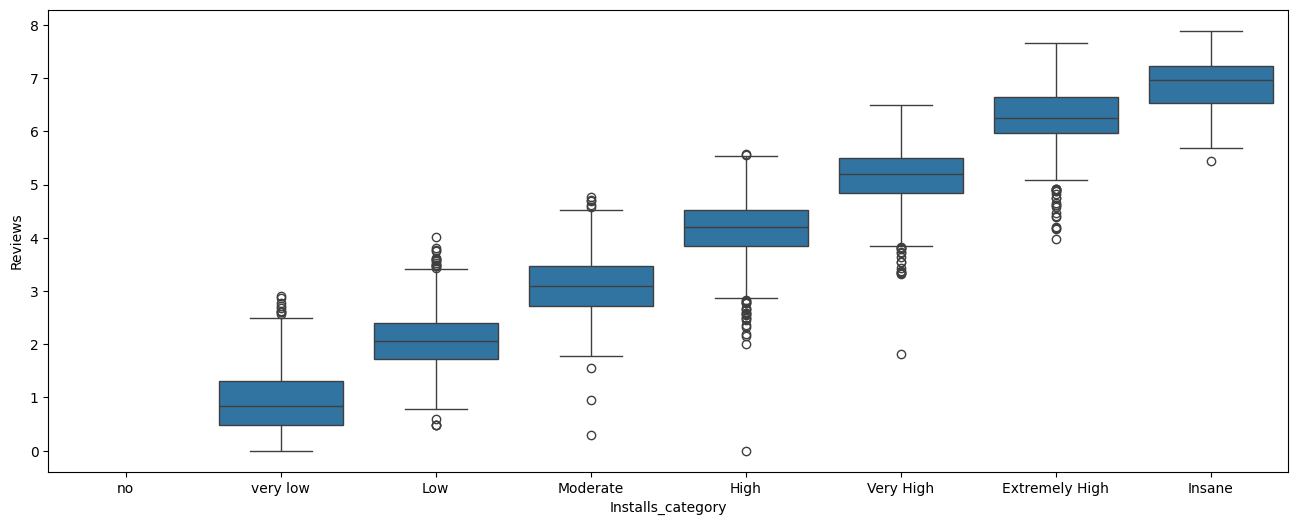

In [66]:
# Let's plot the Reviews with respect to Installs_category
plt.figure(figsize=(16,6))
sns.boxplot(x='Installs_category',y=np.log10(df['Reviews']),data=df)

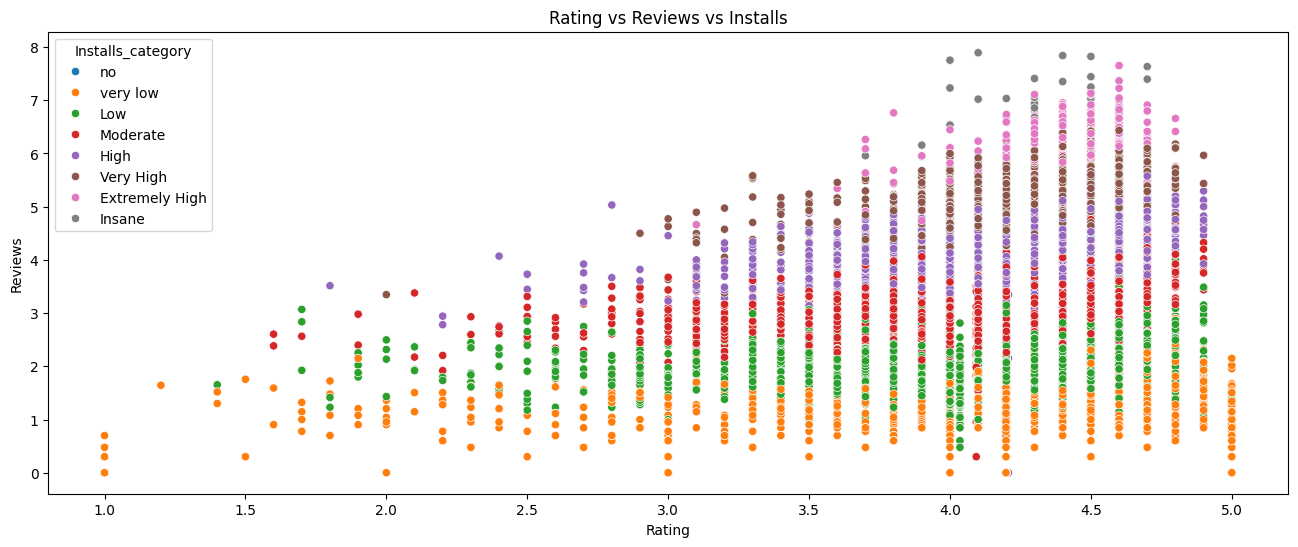

In [67]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16,6))
sns.scatterplot(x='Rating',y=np.log10(df['Reviews']),hue='Installs_category',data=df)
plt.title('Rating vs Reviews vs Installs')
plt.show()

<Axes: xlabel='Reviews', ylabel='Installs'>

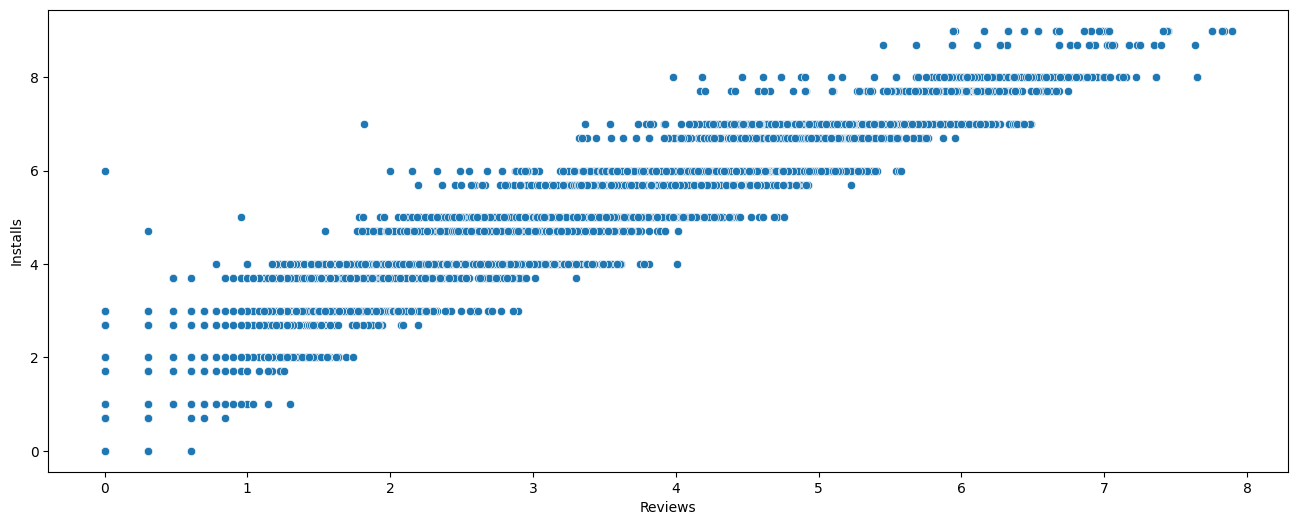

In [68]:
# Plot Installs and Reviews in a scatter plot
plt.figure(figsize=(16,6))
sns.scatterplot(x=np.log10(df['Reviews']),y=np.log10(df['Installs']),data=df)

## Duplicates

In [71]:
# To find the duplicate values in the dataframe
df.duplicated().sum()

np.int64(483)

In [72]:
df['App'].duplicated().sum()

np.int64(1181)

In [73]:
# Let's check for the number of duplicates
for col in df.columns:
    print(f'{col} has {df[col].duplicated().sum()} duplicates')

App has 1181 duplicates
Category has 10796 duplicates
Rating has 10785 duplicates
Reviews has 4830 duplicates
Size_in_Bytes has 10373 duplicates
Installs has 10809 duplicates
Type has 10827 duplicates
Price has 10737 duplicates
Content Rating has 10823 duplicates
Genres has 10710 duplicates
Last Updated has 9453 duplicates
Current Ver has 7998 duplicates
Android Ver has 10796 duplicates
Installs_category has 10821 duplicates


In [74]:
# Find the exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values('App')

,App,Category,Rating,Reviews,Size_in_Bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,High
2543,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,High
2322,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,very low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,very low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,Moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,Moderate
3083,365Scores - Live Scores,SPORTS,4.600000,666521,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,Very High
5415,365Scores - Live Scores,SPORTS,4.600000,666246,26214400.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,Very High


In [75]:
# Remove the duplicates
df.drop_duplicates(inplace=True)

In [76]:
# Print the number of rows and columns after removing the duplicates
print(f'Number of rows after removing the duplicates: {df.shape[0]}')
print(f'Number of columns after removing the duplicates: {df.shape[1]}')

Number of rows after removing the duplicates: 10346
Number of columns after removing the duplicates: 14


## Insights from Data
### Which category has the highest number of Apps?

In [77]:
# In which category has the highest number of apps
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

### Which category has the highest number of installs?

In [78]:
# Category with highest number of installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

### Which category has the highest number of reviews?


In [79]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

### Which category has the highest rating?

In [80]:
# category with highest number of Ratings
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
EVENTS                 4.357597
BOOKS_AND_REFERENCE    4.311342
PERSONALIZATION        4.304697
GAME                   4.277636
PARENTING              4.259759
HEALTH_AND_FITNESS     4.251901
SOCIAL                 4.246873
BEAUTY                 4.246788
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

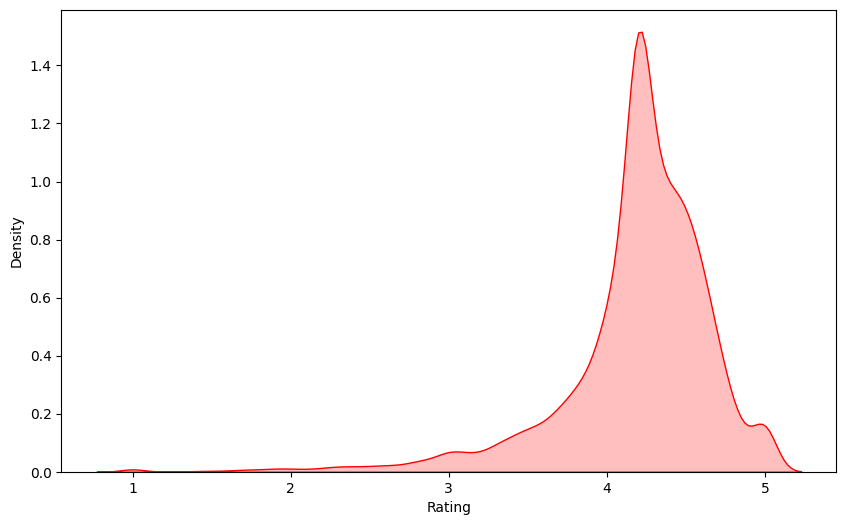

In [82]:
# Plot the rating distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Rating'], shade=True, color='r')